## This keras digit recognizer

In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
np.random.seed(10)

Using TensorFlow backend.


In [2]:
# load the data
train_data = pd.read_csv("./train.csv", sep=",")

train_x = train_data.iloc[:, 1: ]
train_y = train_data.iloc[:, 0:1]

# transfer label number to onehot
train_y_onehot = np_utils.to_categorical(train_y)
train_y_onehot[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [3]:
# build model
model = Sequential()
model.add(Dense(units=256,
          input_dim=784,
          kernel_initializer='normal',
          activation='relu'))

model.add(Dense(units=10,
                kernel_initializer='normal',
                activation='softmax'))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']
             )

In [5]:
train_histoy = model.fit(x=train_x,
                         y=train_y_onehot,validation_split=0.2,
                         epochs=10, batch_size=200, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/10
 - 6s - loss: 8.2968 - acc: 0.4768 - val_loss: 7.9691 - val_acc: 0.4983
Epoch 2/10
 - 3s - loss: 7.2729 - acc: 0.5438 - val_loss: 6.4468 - val_acc: 0.5949
Epoch 3/10
 - 3s - loss: 6.2718 - acc: 0.6060 - val_loss: 6.1532 - val_acc: 0.6145
Epoch 4/10
 - 3s - loss: 5.9864 - acc: 0.6246 - val_loss: 5.9537 - val_acc: 0.6262
Epoch 5/10
 - 3s - loss: 5.8570 - acc: 0.6330 - val_loss: 6.1332 - val_acc: 0.6143
Epoch 6/10
 - 3s - loss: 5.7383 - acc: 0.6408 - val_loss: 5.7796 - val_acc: 0.6383
Epoch 7/10
 - 3s - loss: 5.6975 - acc: 0.6433 - val_loss: 5.7267 - val_acc: 0.6412
Epoch 8/10
 - 3s - loss: 5.6070 - acc: 0.6489 - val_loss: 5.7801 - val_acc: 0.6390
Epoch 9/10
 - 3s - loss: 5.5666 - acc: 0.6517 - val_loss: 5.6845 - val_acc: 0.6445
Epoch 10/10
 - 3s - loss: 4.6604 - acc: 0.7079 - val_loss: 4.2512 - val_acc: 0.7327


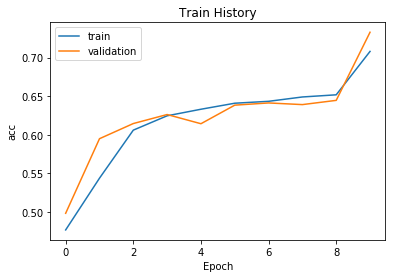

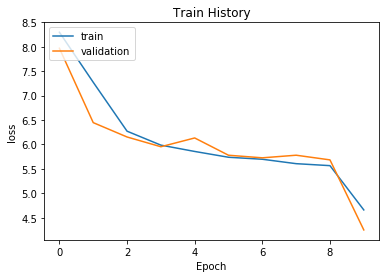

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_histoy, train, validation):
    plt.plot(train_histoy.history[train])
    plt.plot(train_histoy.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_histoy, 'acc', 'val_acc')
show_train_history(train_histoy, 'loss', 'val_loss')

In [14]:
# predict test.csv result
test_x=pd.read_csv("test.csv", sep=',')

test_y=model.predict_classes(test_x)

In [19]:
result=pd.DataFrame({'ImageId':np.arange(1, test_y.size+1), 'Label':test_y})
result.to_csv('result.csv', index=False)